# Online Retail EDA

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1402)

In [74]:
df=pd.read_excel('sales.xlsx')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  525461 non-null  object        
 1   ProductCode    525461 non-null  object        
 2   ProductName    522533 non-null  object        
 3   Quantity       525461 non-null  int64         
 4   InvoiceDate    525461 non-null  datetime64[ns]
 5   UnitPrice      525461 non-null  float64       
 6   CustomerId     417534 non-null  float64       
 7   Country        525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [76]:
print('DataFrame dimensions:', df.shape)

DataFrame dimensions: (525461, 8)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">پیش پردازش</font>
</h2>

<p>
    <ul dir=rtl face="vazir">
        <li>حذف سطر تکراری</li>
        <li>حذف قیمت واحدهای (UnitPrice) منفی</li>
        <li> حذف سطرهای بدون آی دی مشتری (CustomerId)</li>
        <li>گزارش ۵ مشتری که بیشترین کنسلی را داشتند</li>
        <li>حذف سفارشهای کنسل شده</li>
        <li>ذخیره تغییرات با نام remaining.csv</li>
    </ul>
</p>

Dropping Duplicates 

In [77]:
df1 = df.copy()
df1 = df1.drop_duplicates()
print('DataFrame dimensions after Dropping Duplicates:', df1.shape)

DataFrame dimensions after Dropping Duplicates: (518596, 8)


Dropping Negative UnitPrices

In [78]:
df2 = df1[df1['UnitPrice'] >= 0]
print('DataFrame dimensions after Dropping Negative UnitPrices:', df2.shape)

DataFrame dimensions after Dropping Negative UnitPrices: (518593, 8)


Dropping rows without CustomerId

In [79]:
df3 = df2[df2['CustomerId'].notnull()]
print('DataFrame dimensions after Dropping rows without CustomerId:', df3.shape)

DataFrame dimensions after Dropping rows without CustomerId: (410763, 8)


5 Customers with the most Cancels

In [80]:
df3['InvoiceNumber'].str.startswith('C')
df4 = df3['CustomerId'].value_counts().nlargest(5)
df4

CustomerId
14911.0    5707
17841.0    5015
14606.0    3863
14156.0    2708
12748.0    2562
Name: count, dtype: int64

Dropping Cancelled Invoiced

In [81]:
df5 = df3[~df3.InvoiceNumber.str.contains("C", na=False)]
print('DataFrame dimensions after Dropping cancelled Invoices:', df5.shape)
df5.head()

DataFrame dimensions after Dropping cancelled Invoices: (400947, 8)


,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Save as remaining.csv

In [82]:
df5.to_csv('remaining.csv', index=False)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">تحلیل اکتشافی</font>
</h2>

<p>
    <ul dir=rtl face="vazir">
        <li>محاسبه تعدادسفارشات باقیمانده</li>
        <li>بازه زمانی سفارش: حداقل تا حداکثر تاریخ</li>
        <li>رسم نمودار میله ای برای سفارشات روز هفته</li>
        <li>رسم نمودار میله ای از مجموع فروش هر ماه از هر سال</li>
        <li>نمودارها دارای عنوان برای هر محور و دارای شکل مناسب</li>
    </ul>
</p>

Remaining Invoice

In [83]:
df7 = pd.read_csv('remaining.csv')
remiangin_invoices = len(df7.index)
print("Remiangin Invoices: ", remiangin_invoices)

Remiangin Invoices:  400947


InvoiceDate Interval: First and Last Invoice

In [84]:
df8 = pd.to_datetime(df7['InvoiceDate'])
print('The First Date: ', df8.min(), ' - The Last Date: ', df8.max())

The First Date:  2009-12-01 07:45:00  - The Last Date:  2010-12-09 20:01:00


Quantity per Day of the Week Barplot

<BarContainer object of 7 artists>

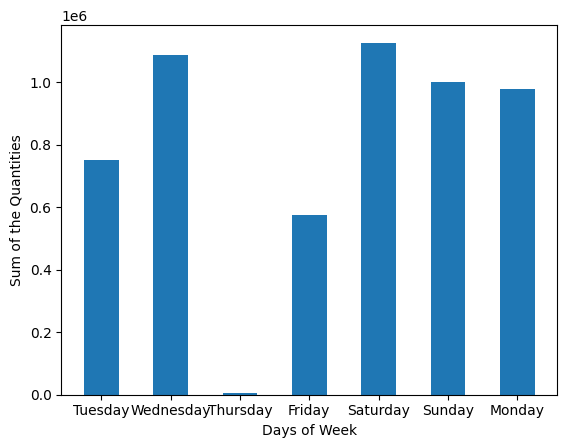

In [85]:
df7['weekday'] = df8.dt.day_name()
df9 = df7[['weekday', 'Quantity']].groupby('weekday').sum()

data1 = df7.weekday.unique()
data2 = df9.Quantity

plt.xlabel("Days of Week")
plt.ylabel("Sum of the Quantities")

plt.bar(data1, data2, width = 0.5)

In [86]:
df9.Quantity

weekday
Friday        750290
Monday       1086812
Saturday        5119
Sunday        574040
Thursday     1125856
Tuesday      1000867
Wednesday     977464
Name: Quantity, dtype: int64

Monthly Sell

<BarContainer object of 12 artists>

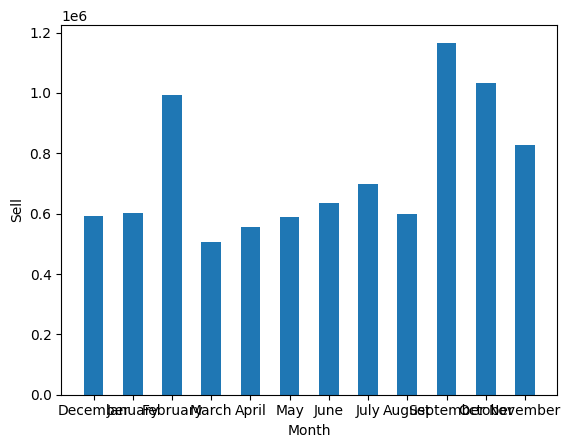

In [87]:
df7['month'] = df8.dt.month_name()
df7['TotalPrice'] = df7.UnitPrice*df7.Quantity
df10 = df7[['month', 'TotalPrice']].groupby('month').sum()

data1 = df7.month.unique()
data2 = df10.TotalPrice

plt.xlabel("Month")
plt.ylabel("Sell")

plt.bar(data1, data2, width = 0.5)